<a id = "3"></a>
Importing the Libraries

In [1]:
# these will be the libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import os
import re

<a id = "4"></a>
Importing the Data

In [3]:
data = pd.read_excel('selected_songs.xlsx')
data

,genre,lyrics,Artist,Song
0,prog,"I am just a new boy,\nStranger in this town.,\...",Pink Floyd,Young Lust Lyrics
1,prog,"Eins, zwei, drei, alle!,Ooooh You cannot reach...",Pink Floyd,Waiting For The Worms Lyrics
2,prog,"All alone, or in twos,\nThe ones who really lo...",Pink Floyd,Outside The Wall Lyrics
3,prog,"Into the distance a ribbon of black,\nStretche...",Pink Floyd,Learning To Fly Lyrics
4,prog,"You got to be crazy, gotta have a real need,\n...",Pink Floyd,Dogs Lyrics
...,...,...,...,...
825,pop,"I Don't Know,\nThat You Want To Try,\nEvertime...",Michael Jackson,Remember The Time Lyrics
826,pop,"Girl, close your eyes,\nLet that rhythm get in...",Michael Jackson,Rock With You Lyrics
827,pop,"Help,\nI have done it again,\nI have been here...",Sia,Breathe Me Lyrics
828,pop,"Yeah, Rihanna,Good Girl Gone Bad,\nTake three,...",Rihanna,Umbrella Lyrics


In [4]:
data["genre"].unique()

array(['prog', 'pop'], dtype=object)

<a id = "3"></a>
 Data Preprocessing

<a id = "6"></a>
Removing Numbers, Punctuations and Lowercasing the Words

In [5]:
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

<a id = "7"></a>
Removing special characters

In [6]:
data["lyrics"] = data["lyrics"].apply(rid_of_specials)
data["lyrics"].head(10)

0    i am just a new boy  stranger in this town   w...
1    eins  zwei  drei  alle  ooooh you cannot reach...
2    all alone  or in twos  the ones who really lov...
3    into the distance a ribbon of black  stretched...
4    you got to be crazy  gotta have a real need  g...
5    long ago and far away in a different age  when...
6    a tiny flame inside my hand  a compromise i ne...
7    i can t see your face  and i can t breathe you...
8    i can t see the meaning of this life i m leadi...
9    out on the road there are fireflies circling  ...
Name: lyrics, dtype: object

In [7]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

<a id = "8"></a>
Explanation
- We have defined a function called rid_of_specials in order to remove special characters from our lyrics.

- Then, we applied this to the "lyrics" column of our imported "selected_songs" data, using .apply()


<a id = "9"></a>
Removing Stopwords

In [8]:
data["lyrics"]

0      i am just a new boy  stranger in this town   w...
1      eins  zwei  drei  alle  ooooh you cannot reach...
2      all alone  or in twos  the ones who really lov...
3      into the distance a ribbon of black  stretched...
4      you got to be crazy  gotta have a real need  g...
                             ...                        
825    i don t know  that you want to try  evertime y...
826    girl  close your eyes  let that rhythm get int...
827    help  i have done it again  i have been here m...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work he said me ...
Name: lyrics, Length: 830, dtype: object

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sw_nltk = (stopwords.words('english'))
stop_words = set(sw_nltk)

In [10]:
def remove_sw(x):
    x = x.split(' ')
    return  ' '.join(z for z in x if z not in stop_words)
stopped = data["lyrics"].apply(remove_sw)
stopped

0      new boy  stranger town   good times   gonna sh...
1      eins  zwei  drei  alle  ooooh cannot reach  oo...
2      alone  twos  ones really love  walk outside wa...
3      distance ribbon black  stretched point turning...
4      got crazy  gotta real need  got sleep toes str...
                             ...                        
825    know  want try  evertime see remember  fell lo...
826    girl  close eyes  let rhythm get  try fight  n...
827    help  done  many times  hurt today  worst part...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work said haffi ...
Name: lyrics, Length: 830, dtype: object

<a id = "10"></a>
Explanation 


1) We imported nltk to remove (and then later tokenize) words

2) We imported stopwords, and let a variable "sw_nltk" be equal to a tuple of stop words in english

3) Then, we let another variable "stop_words" be equal to a set containing these stop words

4) A function "remove_sw" was defined, which uses the variable defined in step 3

5) Finally, we applied this function to our "lyrics" column, using .apply


<a id = "11"></a>
Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
# Step 1
lemmatizer = WordNetLemmatizer()
# Step 2
lemmatized = [lemmatizer.lemmatize(i) for i in stopped]
# Step 3
prepeared_sentence = [''.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence
data['Lyrics_Processed']

0      new boy  stranger town   good times   gonna sh...
1      eins  zwei  drei  alle  ooooh cannot reach  oo...
2      alone  twos  ones really love  walk outside wa...
3      distance ribbon black  stretched point turning...
4      got crazy  gotta real need  got sleep toes str...
                             ...                        
825    know  want try  evertime see remember  fell lo...
826    girl  close eyes  let rhythm get  try fight  n...
827    help  done  many times  hurt today  worst part...
828    yeah  rihanna good girl gone bad  take three  ...
829    work  work  work  work  work  work said haffi ...
Name: Lyrics_Processed, Length: 830, dtype: object

In [12]:
data

,genre,lyrics,Artist,Song,Lyrics_Processed
0,prog,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good times gonna sh...
1,prog,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh cannot reach oo...
2,prog,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone twos ones really love walk outside wa...
3,prog,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning...
4,prog,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy gotta real need got sleep toes str...
...,...,...,...,...,...
825,pop,i don t know that you want to try evertime y...,Michael Jackson,Remember The Time Lyrics,know want try evertime see remember fell lo...
826,pop,girl close your eyes let that rhythm get int...,Michael Jackson,Rock With You Lyrics,girl close eyes let rhythm get try fight n...
827,pop,help i have done it again i have been here m...,Sia,Breathe Me Lyrics,help done many times hurt today worst part...
828,pop,yeah rihanna good girl gone bad take three ...,Rihanna,Umbrella Lyrics,yeah rihanna good girl gone bad take three ...


<a id = "12"></a>
 Explanation of code

- WordNetLemmatizer was imported from nltk.stem
- A variable "lemmatizer" then was created, the imported lemmatizer was assigned.
- Using list comprehension for a for loop, our series "stopped" was lemmatized and assigned to "lemmatized"

<a id = "13"></a>
Explanation of Lemmatization

Lemmatization is, in essence, grouping the different forms of the same word together. This helps us not have noisy data.

e.g: liking, like, likes, liked gets grouped into one single item, e.g. "like".

Pre-made lemmatizers from libraries such as nltk.stem can help us lemmatize such words, and clean our data.

<a id = "14"></a>
Alternatives to Lemmatization
One alternative of lemmatization is called "Stemming", which is also included in the nltk library.

The way stemming works is by removing the last few characters it deems unnecessary, trying to reduce the word to its essentials.

Since Lemmatization understands / considers context and works with the english language as a whole, stemming can be disadvantageous when used in certain words. For example, one word can have different lemmas depending on how it is used. Stemming does not consider this.

<a id = "15"></a>
Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Step 1
vectorizer = CountVectorizer()
# Step 2
X = vectorizer.fit_transform(prepeared_sentence)
# Step 3
feature_names = vectorizer.get_feature_names()
# Step 4
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)


In [14]:
lyrics_vectorized

,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,aaow,abandon,...,zen,zeus,zig,zip,zombies,zone,zoning,zoo,zwei,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06641278,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
X.shape

(830, 8988)

In [17]:
# splitwords = [ nltk.word_tokenize( str(sentence) ) for sentence in  data['Lyrics_Processed'] ]
# print(splitwords)

<a id = "16"></a>
Explanation of code

- Step 1: We assigned CountVectorizer() to our variable: "vectorizer"
- Step 2: We used .fit_transform() to encode the data in prepared_sentence as a vector.
- Step 2.1: .fit() also learns the vocabulary of the input.
- Step 3: As its name suggests, get_feature_names extracts each column's name. And we assign it to feature_names.
- Step 4: Finally, we use .toarray() on our encoded vector and.
- Step 4.1: pd.DataFrame to align all data in a tabular form.


 <a id = "17"></a>
Explanation of countvectorizer

Countvectorizer helps us tokenize, build a vocabulary & encode new documents.

As explained above, when we use CountVectorizer together with fit() and transform(), it returns an encoded vector with a length of the entire vocabulary and an integer count in the form of (sparse) vectors for the number of times each word appeared in the document.


<a id = "18"></a>
Differences between TF-IDF & Count Vectorizer
TF-IDF stands for "Term Frequency – Inverse Document”.

The point of TF-IDF is to calculate how frequent words appear in our dataset, with taking into account how certain words can appear disproportionality more, like the stop words which we got rid of already.

Also worth noting is that TF-IDF returns floats (because it keeps a **frequency score**), while CountVectorizer returns integers

<a id = "19"></a>
Target Preperation

In [18]:
# our genre column of 2 unique variables
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [19]:
# we assign numerical values 1 and 0 to genres "prog" and "pop", respectively.

genre_array = data.genre.map({"prog":1, "pop":0})
genre_array

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: genre, Length: 830, dtype: int64

In [20]:
lyrics_vectorized

,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,aaow,abandon,...,zen,zeus,zig,zip,zombies,zone,zoning,zoo,zwei,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id = "20"></a>
Exploratory Data Analysis

<a id = "21"></a>
General Attributes of Songs & Lyrics

<AxesSubplot:>

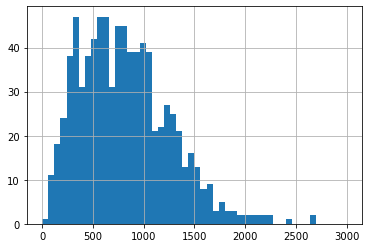

In [21]:
# step 1

data['Lyrics_Processed'].str.len().hist(bins=50, range = (0,3000))

This histogram shows us that the amount of **characters** in song lyrics are mostly in the range of ~(300 - 1200)

<AxesSubplot:>

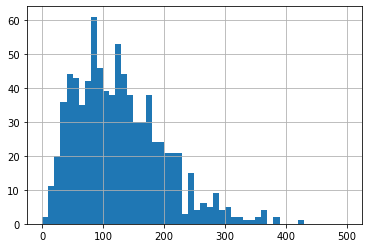

In [22]:
# step 2

data['Lyrics_Processed'].str.split().\
    map(lambda x: len(x)).\
    hist(bins=50, range = (0,500))

This histogram on the other hand, shows us that the amount of **words** in songs are mostly in the range of ~(30 - 200)

Note that we have already removed stop words.

<AxesSubplot:>

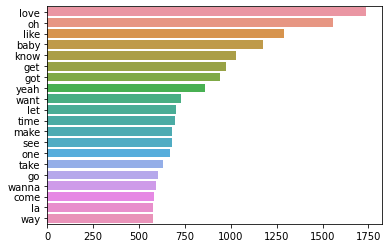

In [23]:
# step 3

corpus=[]
new= data['Lyrics_Processed'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<a id = "22"></a>
Using Ngrams

Ngrams are n amounts of adjacent words. We will utilize them to find patterns & repetitions if possible.


<a id = "23"></a>
Creating variables for lyrics of each genre

Before we continue on with more EDA, we'd like to assign two matrices of words to each genre, so we can work easier with these new variables.


In [24]:
# we see that 412th row is the last progressive rock row.
# 412 was found with trial and error in minimal amount of time.

print(data.genre[412])
print(data.genre[413])

prog
pop


In [25]:
 # creating a variable for rock lyrics, then assigning the "Lyrics Processed" column's rock lyric parts to it.
rock_lyrics = data['Lyrics_Processed'][0:413]
rock_lyrics

0      new boy  stranger town   good times   gonna sh...
1      eins  zwei  drei  alle  ooooh cannot reach  oo...
2      alone  twos  ones really love  walk outside wa...
3      distance ribbon black  stretched point turning...
4      got crazy  gotta real need  got sleep toes str...
                             ...                        
408    beyond horizon place lived young  world magnet...
409    mother  think drop bomb   mother  think like s...
410     yes   stand still laddy   grew went school  c...
411     look mummy   aeroplane sky   ooo ooo ooo ooo ...
412    shall use fill empty   spaces used talk    sha...
Name: Lyrics_Processed, Length: 413, dtype: object

In [26]:
# same process, now for pop lyrics.

pop_lyrics = data['Lyrics_Processed'][413:829]
pop_lyrics

413    leaves brown sky gray   walk winter day   safe...
414    terrify  cuz man  boy  got power  treat like t...
415    naku penda piya naku taka piya mpenziwe  love ...
416    news today  strange weird fact file   singer m...
417    seen world  done  cake  diamonds  brilliant  b...
                             ...                        
824    took baby saturday bang  boy girl   yes  one  ...
825    know  want try  evertime see remember  fell lo...
826    girl  close eyes  let rhythm get  try fight  n...
827    help  done  many times  hurt today  worst part...
828    yeah  rihanna good girl gone bad  take three  ...
Name: Lyrics_Processed, Length: 416, dtype: object

<a id = "24"></a>
Visualizing & analyzing ngrams

In [27]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

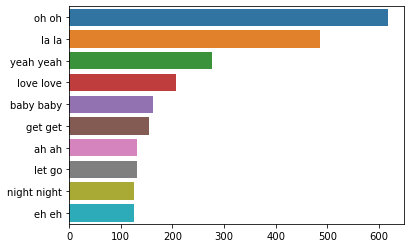

In [28]:
# top 10 bigrams for all lyrics

top_n_bigrams=get_top_ngram(data['Lyrics_Processed'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

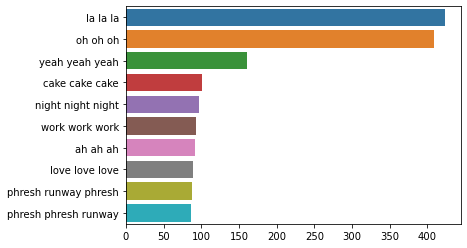

In [29]:
# many repetitions for total of both genres, even when n = 3

top_tri_grams=get_top_ngram(data['Lyrics_Processed'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

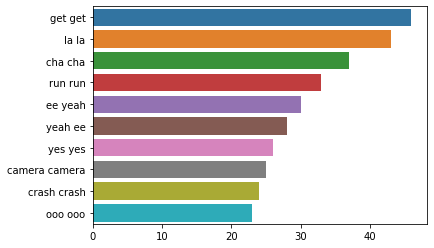

In [30]:
# top 10 bigrams for rock lyrics

top_n_bigrams=get_top_ngram(rock_lyrics,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

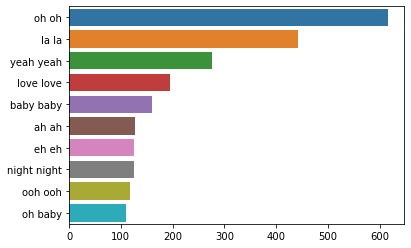

In [31]:
top_n_bigrams=get_top_ngram(pop_lyrics,2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

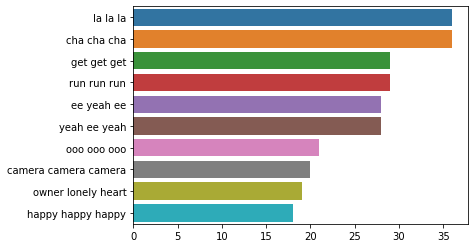

In [32]:
# top 10 trigrams for rock lyrics

top_tri_grams=get_top_ngram(rock_lyrics,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

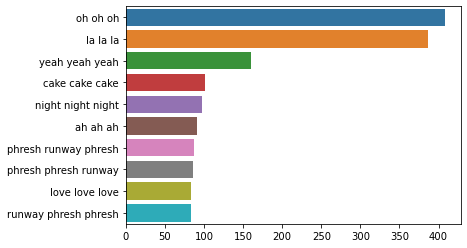

In [33]:
# "la la la" seems to be very prominent in both genres

top_tri_grams=get_top_ngram(pop_lyrics,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<a id = "25"></a>
Creating Wordclouds

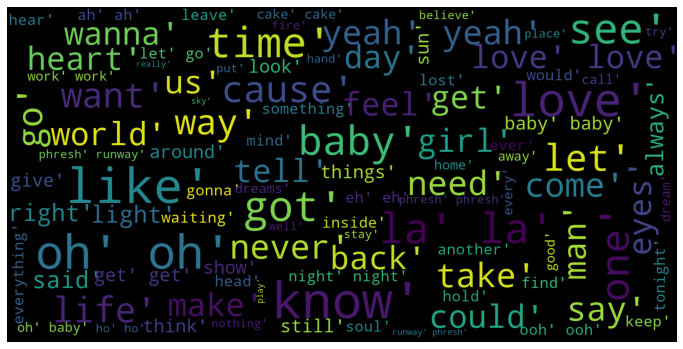

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=4,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

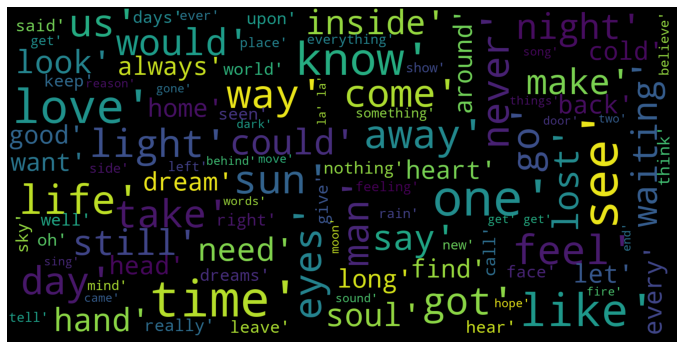

In [35]:
corpus_rock=[]
new= rock_lyrics.str.split()
new=new.values.tolist()
corpus_rock=[word for i in new for word in i]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=4,
        random_state=0)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus_rock)

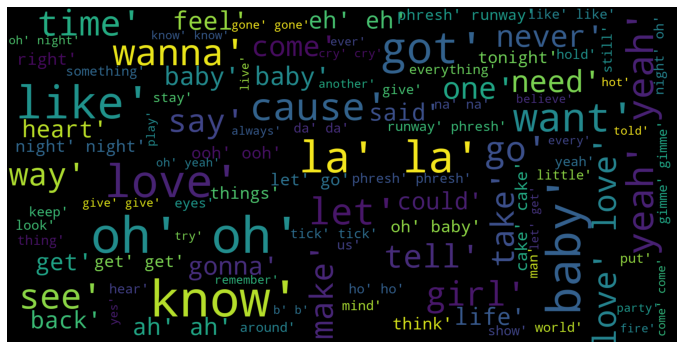

In [36]:
corpus_pop=[]
new= pop_lyrics.str.split()
new=new.values.tolist()
corpus_pop=[word for i in new for word in i]

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=4,
        random_state=0)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus_pop)

<a id = "26"></a>
Sentiment analysis

<AxesSubplot:>

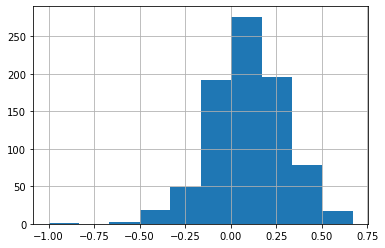

In [37]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

# polarity is a floating-point number that lies in the range of [-1,1] 
# where 1 means positive statement and -1 means a negative statement.

data['polarity_score']=data['Lyrics_Processed'].\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

In [38]:
# We have a pretty normally distributed polarity score,
# which means that these genres in total are neutral in feelings overall

<AxesSubplot:>

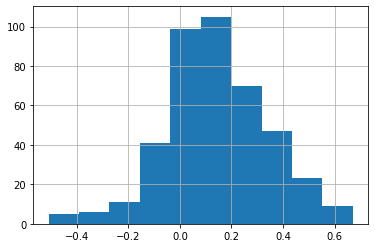

In [39]:
# polarity of pop lyrics
data['polarity_score']=pop_lyrics.\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

<AxesSubplot:>

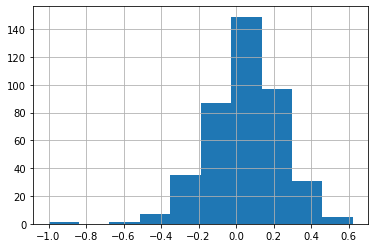

In [40]:
# polarity of rock lyrics
data['polarity_score']=rock_lyrics.\
   apply(lambda x : polarity(x))
data['polarity_score'].hist()

Looking at these three histograms, we can deduce:
- Overall average polarity score is between (0.0 - 0.20)
- Pop lyrics' polarity score is between (0.10 - 0.20)
- Rock lyrics' polarity score is between (-0.05 - 0.15)

Which means rock lyrics have a slightly more negative score than pop lyrics

But overall, both genres seem to have a more positive score than neutral.

In [41]:
data

,genre,lyrics,Artist,Song,Lyrics_Processed,polarity_score
0,prog,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good times gonna sh...,-0.216364
1,prog,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh cannot reach oo...,-0.058333
2,prog,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone twos ones really love walk outside wa...,0.077083
3,prog,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning...,0.043773
4,prog,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy gotta real need got sleep toes str...,-0.002639
...,...,...,...,...,...,...
825,pop,i don t know that you want to try evertime y...,Michael Jackson,Remember The Time Lyrics,know want try evertime see remember fell lo...,NaN
826,pop,girl close your eyes let that rhythm get int...,Michael Jackson,Rock With You Lyrics,girl close eyes let rhythm get try fight n...,NaN
827,pop,help i have done it again i have been here m...,Sia,Breathe Me Lyrics,help done many times hurt today worst part...,NaN
828,pop,yeah rihanna good girl gone bad take three ...,Rihanna,Umbrella Lyrics,yeah rihanna good girl gone bad take three ...,NaN


<a id = "27"></a>
Feature Creation & Selection

<a id = "29"></a>
Select / Eliminate redundant features

<a id = "30"></a>
 Justifying how in theory more is better, but in real life it is not

As seen on numerous machine learning examples, more information, more learning, more of everything is not always what is best for our prediction model, since it can result in skewed estimations such as with overfitting.

<a id = "31"></a>
 Performing feature selection/elimination

In [43]:
# we only need these columns

data[["genre", "Lyrics_Processed"]]

,genre,Lyrics_Processed
0,prog,new boy stranger town good times gonna sh...
1,prog,eins zwei drei alle ooooh cannot reach oo...
2,prog,alone twos ones really love walk outside wa...
3,prog,distance ribbon black stretched point turning...
4,prog,got crazy gotta real need got sleep toes str...
...,...,...
825,pop,know want try evertime see remember fell lo...
826,pop,girl close eyes let rhythm get try fight n...
827,pop,help done many times hurt today worst part...
828,pop,yeah rihanna good girl gone bad take three ...


In [44]:
data.columns

Index(['genre', 'lyrics', 'Artist', 'Song', 'Lyrics_Processed',
       'polarity_score'],
      dtype='object')

<a id = "32"></a>
Train - Test Splitting

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, genre_array, test_size=0.2, random_state=0)

<a id = "33"></a>
Modelling

<a id = "34"></a>
Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [47]:
print("Naive Bayes Score: ", nb.score(X_test,y_test) )

Naive Bayes Score:  0.7831325301204819


<a id = "35"></a>
 Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
print("Decision Tree Score: ", dt.score(X_test,y_test) )

Decision Tree Score:  0.8554216867469879


<a id = "36"></a>
Random Forest Algorithm

In [50]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=550, max_depth=300, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=300, n_estimators=550, random_state=0)

In [51]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

<a id = "37"></a>
Model Evaluation

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[81  4]
 [10 71]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        85
           1       0.95      0.88      0.91        81

    accuracy                           0.92       166
   macro avg       0.92      0.91      0.92       166
weighted avg       0.92      0.92      0.92       166

0.9156626506024096


In [53]:
print("Naive Bayes Score: ", nb.score(X_test,y_test) )
print("Decision Tree Score: ", dt.score(X_test,y_test) )
print("Random Forest Score: ",accuracy_score(y_test, y_pred))

Naive Bayes Score:  0.7831325301204819
Decision Tree Score:  0.8554216867469879
Random Forest Score:  0.9156626506024096


~ 0.91, 0.82, 0.9 are the accuracy scores for our prediction, using Naive Bayes, Decision Tree and Random Forest respectively.

Using Random Forest Classifier, our precision, f1-score and accuracy are all above 0.90. 

<a id = "38"></a>
Conclusion

To summarize,
- We defined the problem,
- We then imported the data & the libraries to use,
- We preprocessed the data, removing certain parts, lemmatizing & vectorizing it,
- We have visualized the data for a better understanding,
- The lyrics were put through a sentiment analysis,
- The data was then split into train & test groups,
- Random Forest model was applied for prediction,
- Finally, the model was evaluated, and accuracy ratings of 0.91, 0.82 and 0.9 were the outcomes, among others.